# Transfer learning and fine-tuning

First we need to import several important packages.

In [33]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras

In [34]:
from tensorflow.keras import utils 

Now download the dataset, which contains images of cats and dogs.  
Then create a `tf.data.Dataset` for training and a dataset for validation.  
Note here the batch size is 32 and img is 160x160x3.

In [3]:
# location of data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# download the data and extract it
path_to_zip = utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# construct paths
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# parameters for datasets
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# construct train and validation datasets 
train_dataset = utils.image_dataset_from_directory(train_dir,
                                                   shuffle=True,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE)

validation_dataset = utils.image_dataset_from_directory(validation_dir,
                                                        shuffle=True,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMG_SIZE)

# construct the test dataset by taking every 5th observation out of the validation dataset
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

C:\Users\libby\.keras\datasets\cats_and_dogs_filtered
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


And get our dataset class name here.

In [4]:
class_names = train_dataset.class_names

### Improve the performance by setting `buffer_size =AUTOTUNE`

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Show some cats and dogs of our dataset.

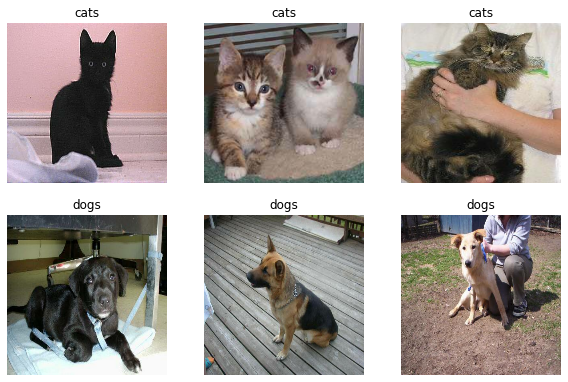

In [6]:
def show_simples(dataset)
    cats=[] 
    dogs=[]
    #new empty list to save images
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(32):
            #choose cats
            if labels[i]==0:
                cats.append(images[i].numpy().astype("uint8"))
            #choose dogs
            if labels[i]==0:
                dogs.append(images[i].numpy().astype("uint8"))
    for i in range(6):
        if i<3:
            #show 3 cats' images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(cats[i])
            # Add title
            plt.title("cats")
            plt.axis("off")
        else:
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(dogs[i])
            plt.title("dogs")
            plt.axis("off")
show_simples(train_dataset)

## Check label frequencies

In [7]:
labels_iterator= train_dataset.unbatch().map(lambda image, label: label).as_numpy_iterator()
#Create an iterator 

In [8]:
dogs_freq=0
cats_freq=0
for label in labels_iterator:
    if label ==0:
        cats_freq=cats_freq+1
        #Add 1 to cats counter
    else:
        dogs_freq=dogs_freq+1
        #Add 1 to dogs counter
print("dogs_freq = ",dogs_freq)
print("cats_freq = ",cats_freq)

dogs_freq =  1000
cats_freq =  1000


So the base line will be `50%`,since we have 1000 dogs images and 1000 cats images.

## Model 1
Simply use `tf.keras.Sequential` model with some layers to train.

In [9]:
from tensorflow.keras import datasets, layers, models

In [10]:
model1 = models.Sequential([
    layers.Conv2D(8, (9, 9), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.Conv2D(128, (4, 4), activation='relu'),
    # 4 convolution blocks with a max pooling layer
    layers.Dropout(0.2),
    #drop 20% parameters randomly, left 80%
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #fully-connected layer
    layers.Dense(2)
])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train the dataset
history = model1.fit(train_dataset, 
                     epochs=20,
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 20s 81ms/step - loss: 3.5748 - accuracy: 0.5255 - val_loss: 0.6932 - val_accuracy: 0.5235
Epoch 2/20
63/63 [==============================] - 3s 52ms/step - loss: 0.6838 - accuracy: 0.5445 - val_loss: 0.6898 - val_accuracy: 0.5470
Epoch 3/20
63/63 [==============================] - 3s 51ms/step - loss: 0.6693 - accuracy: 0.5675 - val_loss: 0.7060 - val_accuracy: 0.5322
Epoch 4/20
63/63 [==============================] - 3s 50ms/step - loss: 0.6503 - accuracy: 0.5755 - val_loss: 0.7102 - val_accuracy: 0.5210
Epoch 5/20
63/63 [==============================] - 3s 49ms/step - loss: 0.6214 - accuracy: 0.6195 - val_loss: 0.7434 - val_accuracy: 0.5260
Epoch 6/20
63/63 [==============================] - 3s 51ms/step - loss: 0.5849 - accuracy: 0.6500 - val_loss: 0.7714 - val_accuracy: 0.5285
Epoch 7/20
63/63 [==============================] - 3s 50ms/step - loss: 0.5561 - accuracy: 0.6625 - val_loss: 0.8597 - val_accuracy: 0.5384
Epoch 8/20
6

Try to improve or layers to see if we can achieve better `val_accuracy`

In [11]:
model1 = models.Sequential([
    layers.Conv2D(8, (9, 9), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.Conv2D(128, (4, 4), activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10) 
])

In [12]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model1.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 4s 52ms/step - loss: 4.7760 - accuracy: 0.5000 - val_loss: 0.7078 - val_accuracy: 0.5037
Epoch 2/20
63/63 [==============================] - 3s 48ms/step - loss: 0.6965 - accuracy: 0.5235 - val_loss: 0.6777 - val_accuracy: 0.5359
Epoch 3/20
63/63 [==============================] - 3s 50ms/step - loss: 0.6827 - accuracy: 0.5650 - val_loss: 0.6702 - val_accuracy: 0.5804
Epoch 4/20
63/63 [==============================] - 3s 50ms/step - loss: 0.6480 - accuracy: 0.6250 - val_loss: 0.6373 - val_accuracy: 0.6176
Epoch 5/20
63/63 [==============================] - 3s 50ms/step - loss: 0.5942 - accuracy: 0.6800 - val_loss: 0.6240 - val_accuracy: 0.6584
Epoch 6/20
63/63 [==============================] - 3s 49ms/step - loss: 0.5707 - accuracy: 0.6930 - val_loss: 0.6665 - val_accuracy: 0.6485
Epoch 7/20
63/63 [==============================] - 3s 50ms/step - loss: 0.5399 - accuracy: 0.7330 - val_loss: 0.5893 - val_accuracy: 0.7178
Epoch 8/20
63

Plot the training data.

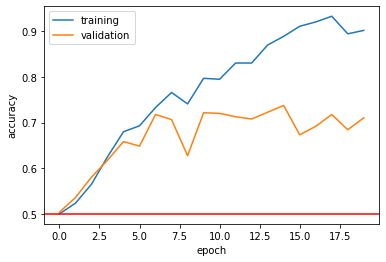

In [14]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.axhline(y=0.50, color='r', linestyle='-')
plt.legend()

The accuracy of my model stabilized `between 65% and 70%` during training.  
My model did `15%` better than the baseline.
Yes! There's overfitting in my model, the training accuracy is much higher than the validation accuracy.

## Model 2 with Data Augmentation

Data augmentation is used to like slightly change the orginal data, like rotate or filp, which should help our training.

Test for tf.keras.layers.RandomFlip() layer

In [15]:
filp_random=tf.keras.layers.RandomFlip('horizontal_and_vertical')
#RandomFilp either

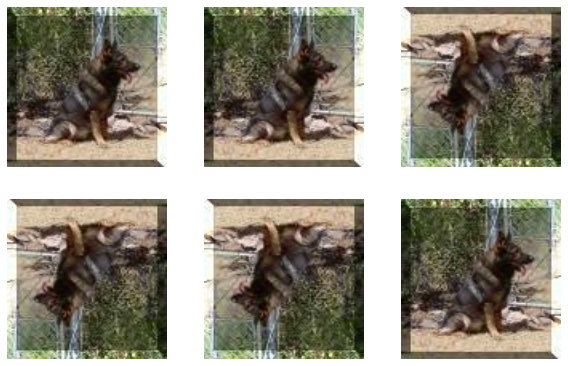

In [16]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = filp_random(tf.expand_dims(first_image, 0))
    #apply the layer
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Test for tf.keras.layers.RandomRotation() layer

In [17]:
rt_random=tf.keras.layers.RandomRotation(0.8)
#randomly rotate between[-80% * 2pi, 80% * 2pi].

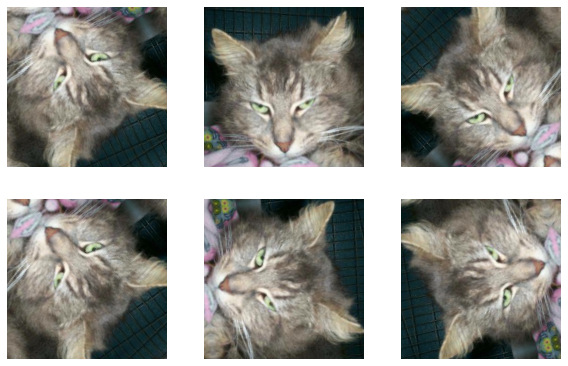

In [18]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = rt_random(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Train our model 2

In [19]:
model2 = models.Sequential([
    layers.RandomRotation(0.8),
    layers.RandomFlip('horizontal_and_vertical'),
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (4, 4), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10) 
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model2.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 5s 65ms/step - loss: 1.9141 - accuracy: 0.4940 - val_loss: 0.6953 - val_accuracy: 0.5347
Epoch 2/20
63/63 [==============================] - 4s 60ms/step - loss: 0.7090 - accuracy: 0.5310 - val_loss: 0.6906 - val_accuracy: 0.5384
Epoch 3/20
63/63 [==============================] - 4s 55ms/step - loss: 0.7005 - accuracy: 0.5210 - val_loss: 0.6830 - val_accuracy: 0.5644
Epoch 4/20
63/63 [==============================] - 3s 51ms/step - loss: 0.6845 - accuracy: 0.5745 - val_loss: 0.6700 - val_accuracy: 0.5879
Epoch 5/20
63/63 [==============================] - 3s 51ms/step - loss: 0.6778 - accuracy: 0.5825 - val_loss: 0.6542 - val_accuracy: 0.6300
Epoch 6/20
63/63 [==============================] - 3s 52ms/step - loss: 0.6708 - accuracy: 0.5985 - val_loss: 0.6751 - val_accuracy: 0.5916
Epoch 7/20
63/63 [==============================] - 3s 51ms/step - loss: 0.6478 - accuracy: 0.6315 - val_loss: 0.6552 - val_accuracy: 0.6114
Epoch 8/20
63

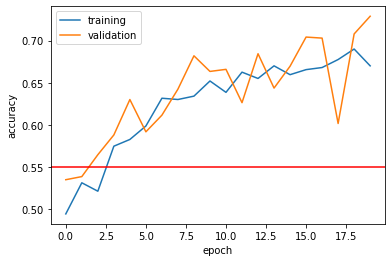

In [20]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.axhline(y=0.55, color='r', linestyle='-')
plt.legend()

The accuracy of my model 2 stabilized `between 64% and 70%` during training.  
My model 2 did just as good as the model 1.  
There's no overfitting this time.

## Model 3 with preprocessor

The original data's RGB channel is between `0-255`, and if we normalize it between `0-1` or `-1 to 1`, our training model may have a better performance.

In [21]:
i = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(i)
preprocessor = tf.keras.Model(inputs = [i], outputs = [x])

In [22]:
model3 = models.Sequential([
    preprocessor,
    #put preprocessor before conv2D layers
    layers.RandomRotation(0.8),
    layers.RandomFlip('horizontal_and_vertical'),
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2)
])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model3.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 6s 68ms/step - loss: 0.7756 - accuracy: 0.5140 - val_loss: 0.6767 - val_accuracy: 0.5235
Epoch 2/20
63/63 [==============================] - 4s 56ms/step - loss: 0.6752 - accuracy: 0.5710 - val_loss: 0.6357 - val_accuracy: 0.6423
Epoch 3/20
63/63 [==============================] - 4s 55ms/step - loss: 0.6312 - accuracy: 0.6270 - val_loss: 0.6154 - val_accuracy: 0.6399
Epoch 4/20
63/63 [==============================] - 4s 55ms/step - loss: 0.5967 - accuracy: 0.6680 - val_loss: 0.5852 - val_accuracy: 0.6720
Epoch 5/20
63/63 [==============================] - 4s 55ms/step - loss: 0.5795 - accuracy: 0.6830 - val_loss: 0.5766 - val_accuracy: 0.6993
Epoch 6/20
63/63 [==============================] - 4s 60ms/step - loss: 0.5815 - accuracy: 0.6865 - val_loss: 0.5668 - val_accuracy: 0.6980
Epoch 7/20
63/63 [==============================] - 4s 59ms/step - loss: 0.5602 - accuracy: 0.7060 - val_loss: 0.6023 - val_accuracy: 0.6696
Epoch 8/20
63

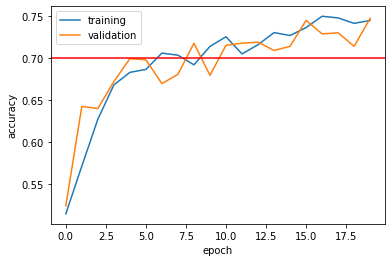

In [23]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.axhline(y=0.7, color='r', linestyle='-')
plt.legend()

The accuracy of my model 3 stabilized `between 71% and 73%` during training.  
My model 3 did  `16%` better than the model 1.  
There's no overfitting this time.

## Model 4 Transfer Learning

We can use the model someone alreay trained that does the similar job.  
Here we use MobileNet V2 developed at Google

In [24]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
#Freeze the convolutional base

i = tf.keras.Input(shape=IMG_SHAPE)
x = base_model(i, training = False)
base_model_layer = tf.keras.Model(inputs = [i], outputs = [x])

9420800/9406464 [==============================] - 0s 0us/step


In [25]:
model4 = models.Sequential([
    preprocessor,
    layers.RandomRotation(0.8),
    layers.RandomFlip('horizontal_and_vertical'),
    base_model_layer,
    layers.GlobalMaxPooling2D(),
    #average over the spatial 5x5 spatial locations
    layers.Dense(2)
    #number of classes
])


In [26]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 160, 160, 3)       0         
                                                                 
 random_rotation_3 (RandomRo  (None, 160, 160, 3)      0         
 tation)                                                         
                                                                 
 random_flip_3 (RandomFlip)  (None, 160, 160, 3)       0         
                                                                 
 model_1 (Functional)        (None, 5, 5, 1280)        2257984   
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense_8 (Dense)             (None, 2)                

Wow we have so much parameters!

In [28]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model4.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 8s 89ms/step - loss: 0.9729 - accuracy: 0.7445 - val_loss: 0.1867 - val_accuracy: 0.9369
Epoch 2/20
63/63 [==============================] - 5s 70ms/step - loss: 0.4320 - accuracy: 0.8695 - val_loss: 0.1620 - val_accuracy: 0.9554
Epoch 3/20
63/63 [==============================] - 5s 72ms/step - loss: 0.3565 - accuracy: 0.8955 - val_loss: 0.1464 - val_accuracy: 0.9554
Epoch 4/20
63/63 [==============================] - 5s 72ms/step - loss: 0.3512 - accuracy: 0.8875 - val_loss: 0.1295 - val_accuracy: 0.9604
Epoch 5/20
63/63 [==============================] - 5s 70ms/step - loss: 0.3712 - accuracy: 0.8900 - val_loss: 0.1382 - val_accuracy: 0.9592
Epoch 6/20
63/63 [==============================] - 5s 69ms/step - loss: 0.2985 - accuracy: 0.9115 - val_loss: 0.1076 - val_accuracy: 0.9666
Epoch 7/20
63/63 [==============================] - 5s 70ms/step - loss: 0.3283 - accuracy: 0.8965 - val_loss: 0.1529 - val_accuracy: 0.9480
Epoch 8/20
63

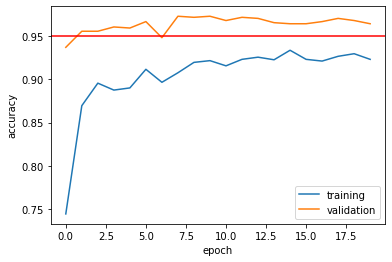

In [29]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.axhline(y=0.95, color='r', linestyle='-')
plt.legend()

The accuracy of my model 4 stabilized `between 95% and 98%` during training.  
My model 4 did  `48%` better than the model 1.  
There's no overfitting this time.

##  Score on Test Data

In [32]:
model4.evaluate(test_dataset)

6/6 [==============================] - 1s 65ms/step - loss: 0.1258 - accuracy: 0.9688


[0.12578193843364716, 0.96875]

The accuracy is 0.9688, which is extremely high!  
The model others write is great!